In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dyawitz/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Congratulations!
You built a model. Now you have to present it. 

### How might different audiences respond to the following statments:
    
1. The predictive model I built has an accuracy of 80%.
2. The logistic regression was optimized with L2 regularization, so you know it's good.
3. Gender was more important than age in the predictive model because it had a larger coefficient.
4. Here's the AUC chart that shows how well the model did.

### We'll go over how to make 3 charts for classification:

- Probability Plot
- Confusion Matrix
- ROC Curve


## But first let's review our terms:
![](assets/images/confusion_matrix.png)

## ... and talk about geese

# Example walkthrough
Using a dataset of flight delays let's:
- try to predict whether a flight will be delayed by 15 minutes
- visualize our predictions

In [5]:
df = pd.read_csv('assets/dataset/flight_delays.csv')
df.head(3)

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,Unnamed: 15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0,NaN
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0,NaN
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0,NaN


Turn the days of the week into dummy variables and remove null y-values:

In [6]:
df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow'))
df = df[df.DEP_DEL15.notnull()].copy()
df.head(2)

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,...,DEP_TIME,DEP_DEL15,Unnamed: 15,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,dow_7
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,855.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,856.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Run a logistic regression model to predict delays:

In [7]:
import sklearn.linear_model as lm

model = lm.LogisticRegression()
#Only features are time of day and day of the week
features = ['CRS_DEP_TIME', 'dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6']

X = df[features]
y = df['DEP_DEL15']
#this is a binary column: was the flight delayed or not?

model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

One effective way to explain your model over particular variables is to plot the predicted variables against the most explanatory variables. For example, with logistic regression, plotting the probability of a class against a variable can help explain the range of effect on the model.

```model.predict_proba``` will give you the probability of an outcome, instead of just the outcome:

In [8]:
## COPY THE LECTURE CODE


In [ ]:
days = ['dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6']
names = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat'] 
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

plt.figure(figsize=(10,6))
ax = plt.subplot(111)

for e, c in enumerate(colors):
    df[df[days[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', label = names[e], color = c, ax=ax)

ax.legend(loc='upper left')
ax.set_title('Probability of Delay\n Based on Day of Week and Time of Day')
ax.set_xlabel('Scheduled departure time (2400 clock)')

![Plotting Probabilities](assets/images/plotting_proba.png)


### Advantages of a probability plot
- Interpretable! Shows how odds change with respect to one variable
- Can be helpful to demonstrate key takeaways to a stakeholder

### SKlearn has a built in confusion matrix function that lets you see your cm as a 2x2 matrix

In [10]:
from sklearn.metrics import confusion_matrix


##Copy the lecture code

array([[367333,      0],
       [ 90978,      0]])

Ask yourself: what does this model mean?

In [11]:
sum(predictions)

0.0

In [12]:
features = ['CRS_DEP_TIME', 'DAY_OF_WEEK', "DAY_OF_MONTH" ]

X = df[features]
y = df['DEP_DEL15']
#this is a binary column: was the flight delayed or not?

model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
predictions = model.predict(X)
sum(predictions)

1255.0

In [14]:

cm = confusion_matrix(y, predictions)
cm

array([[366501,    832],
       [ 90555,    423]])

In [15]:
import matplotlib.patheffects as path_effects

def plot_confusion_matrix(cm, title='Confusion matrix', labels=['Positive','Negative'], cmap=plt.cm.Blues):
    
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
        
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                                       path_effects.Normal()]) #The last line here adds a text outline

### We can write some matplotlib to make that confusion matrix look nice

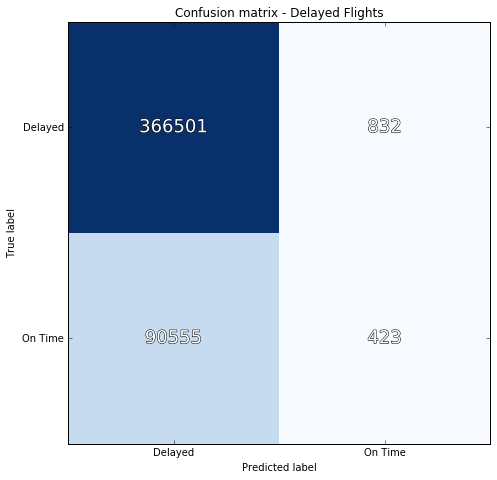

In [16]:
plot_confusion_matrix(cm, title='Confusion matrix - Delayed Flights', labels=['Delayed','On Time'], cmap=plt.cm.Blues)

Ask yourself: What does good coloring on an confusion matrix look like?

### Advantages of a confusion matrix
- Clearly visualizes what the true and false positive rates are
- Can be useful for a non-techincal audience, but requires good labeling and explanation. 

### Sklearn also has an ROC package that exports your false positive rate, true positive rate and thresholds as 3 arrays

In [18]:
from sklearn.metrics import roc_curve

roc = roc_curve(y, predictions)
roc

(array([ 0.        ,  0.00226497,  1.        ]),
 array([ 0.        ,  0.00464948,  1.        ]),
 array([ 2.,  1.,  0.]))

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split

def getROCcurve(roc, title='ROC Curve', xlabel ='% of False Positives', ylabel = '% of True Positives'):
    
    fpr, tpr, thresholds = roc
    
    fig,ax = plt.subplots()
    ax.plot(fpr, tpr, label='ROC Curve')

    fig.set_size_inches(7, 6, forward=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='best')
    


### We can plot these in matplotlib too:

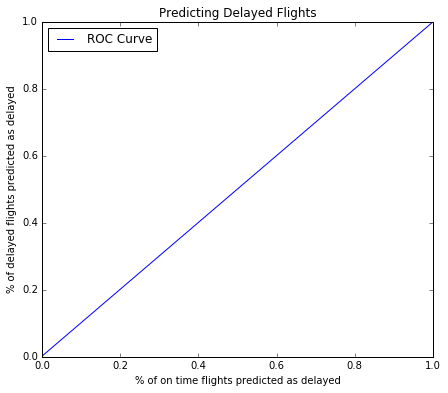

In [22]:
getROCcurve(roc, title='Predicting Delayed Flights', ylabel='% of delayed flights predicted as delayed',\
            xlabel='% of on time flights predicted as delayed')

![](http://gim.unmc.edu/dxtests/roccomp.jpg)

### Advantages of an ROC Curve
- Shows the details of your model's performance as you tune it
- Helpful for stats- and techincal audiences
- Not ideal for non-technical stakeholders

# Guided Practice
Here's a dataset of grad school admissions, based on GPA, rank, and GRE score. In the admit column "1" is admit.

In [21]:
df = pd.read_csv('assets/dataset/collegeadmissions.csv')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [ ]:
## Build a classification model of your choice. 

features = ['gre', 'gpa', 'rank']
X = df[features]
y = df['admit']



In [ ]:
## use your model to predict admissions. 
predictions = 

How well does your prediction do compared to the actual values? 

### Confusion Matrix

In [ ]:
## Generate a confusion matrix in sklearn


In [ ]:
## plot the confusion matrix in matplotlib. 
## BONUS: customize it. Play with the colors, labels and axes


### ROC Curve

In [ ]:
## Generate an ROC Curve in sklearn

In [ ]:
## plot the confusion matrix in matplotlib. 
## BONUS: customize it. Play with the colors and labels

# BONUS: Evaluate Your Model
Look up the following sklearn metrics, explain what they mean, and use them to explain how well your model is doing.

You can read more here: http://scikit-learn.org/stable/modules/classes.html#classification-metrics



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc #area under the curve -- which curve?